# 1. Membaca Dataset



dataset diunduh dari https://www.kaggle.com/datasets/uciml/indian-liver-patient-records

In [2]:
#Menghubungkan Google Drive ke Google Colab agar bisa akses file csv
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# Mengimport library pandas untuk membaca dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dibimbing.id/indian_liver_patient.csv')

In [4]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# 2. Ringkasan Data

`info()` : berguna untuk memahami dengan cepat struktur dan konten DataFrame, membantu dalam eksplorasi dan persiapan data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
# cek statiscial summary
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
# cek statiscial summary
df['Gender'].describe()

,Gender
count,583
unique,2
top,Male
freq,441


# 3. Mengecek Data yang Hilang (Missing Value)

In [20]:
# mengecek missing value
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


**Observasi:**

Dari informasi diatas terdapat data yang hilang pada kolom `Albumin_and_Globulin_Ratio`

In [21]:
# Mengatasi missing value
for column in df.columns:
    if df[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Jika kolom bertipe numerik, isi dengan mean
        df[column].fillna(df[column].mean(), inplace=True)

/tmp/ipython-input-21-3213337050.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/tmp/ipython-input-21-3213337050.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [10]:
# cek kembali missing value
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


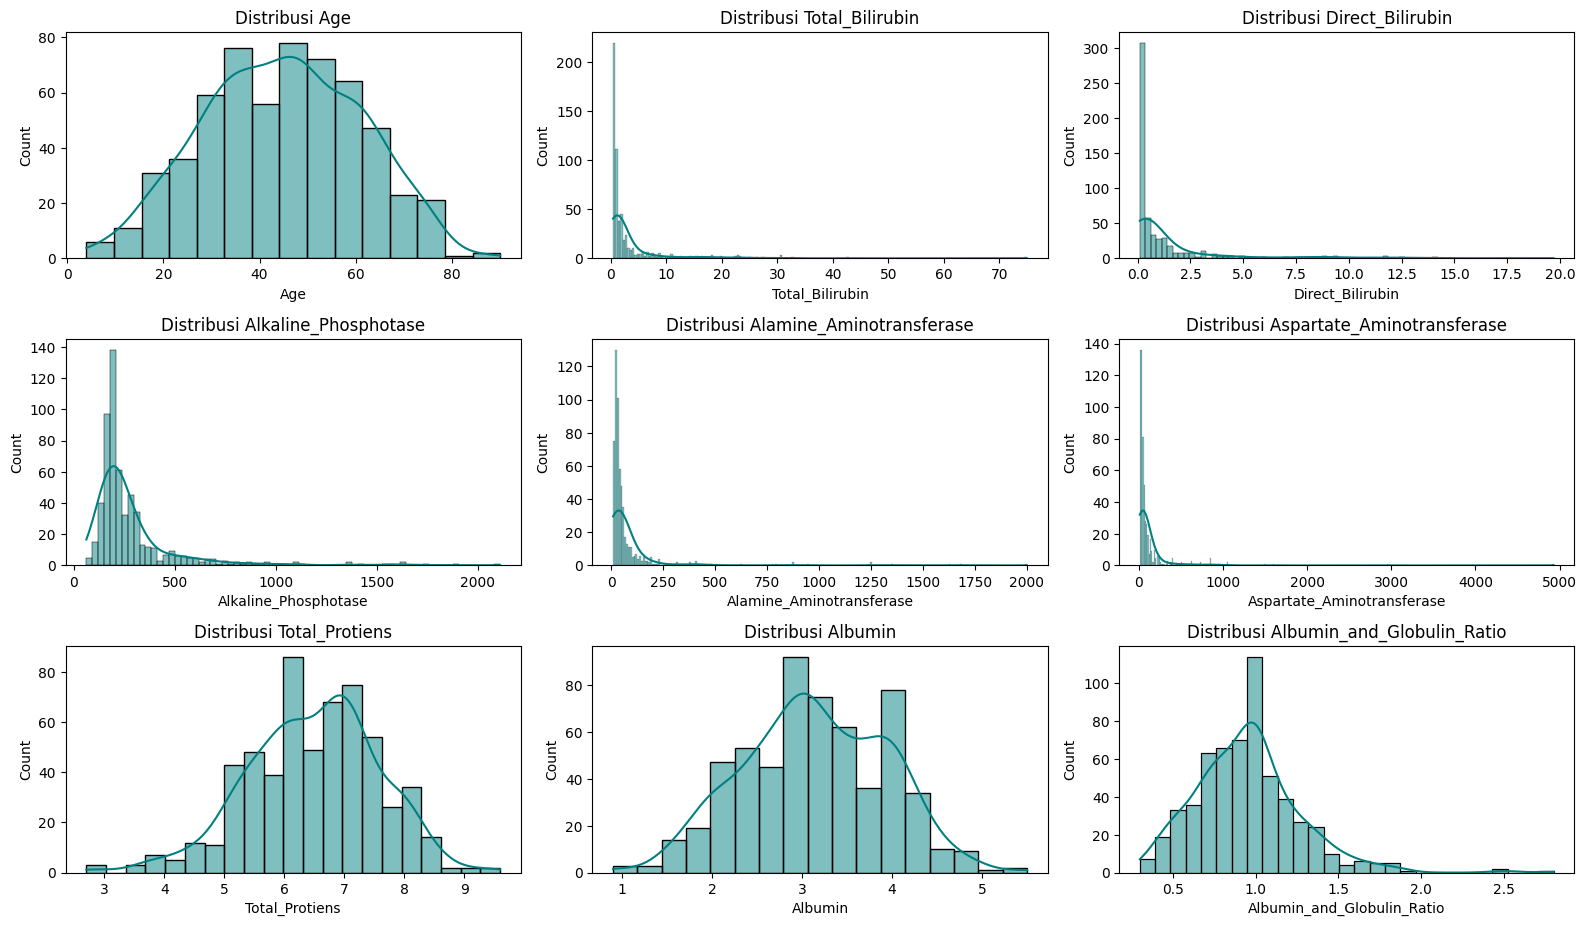

In [13]:
#Menampikan visualisasi data untuk mengetahui distribusi data numerik
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(['Dataset'])

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

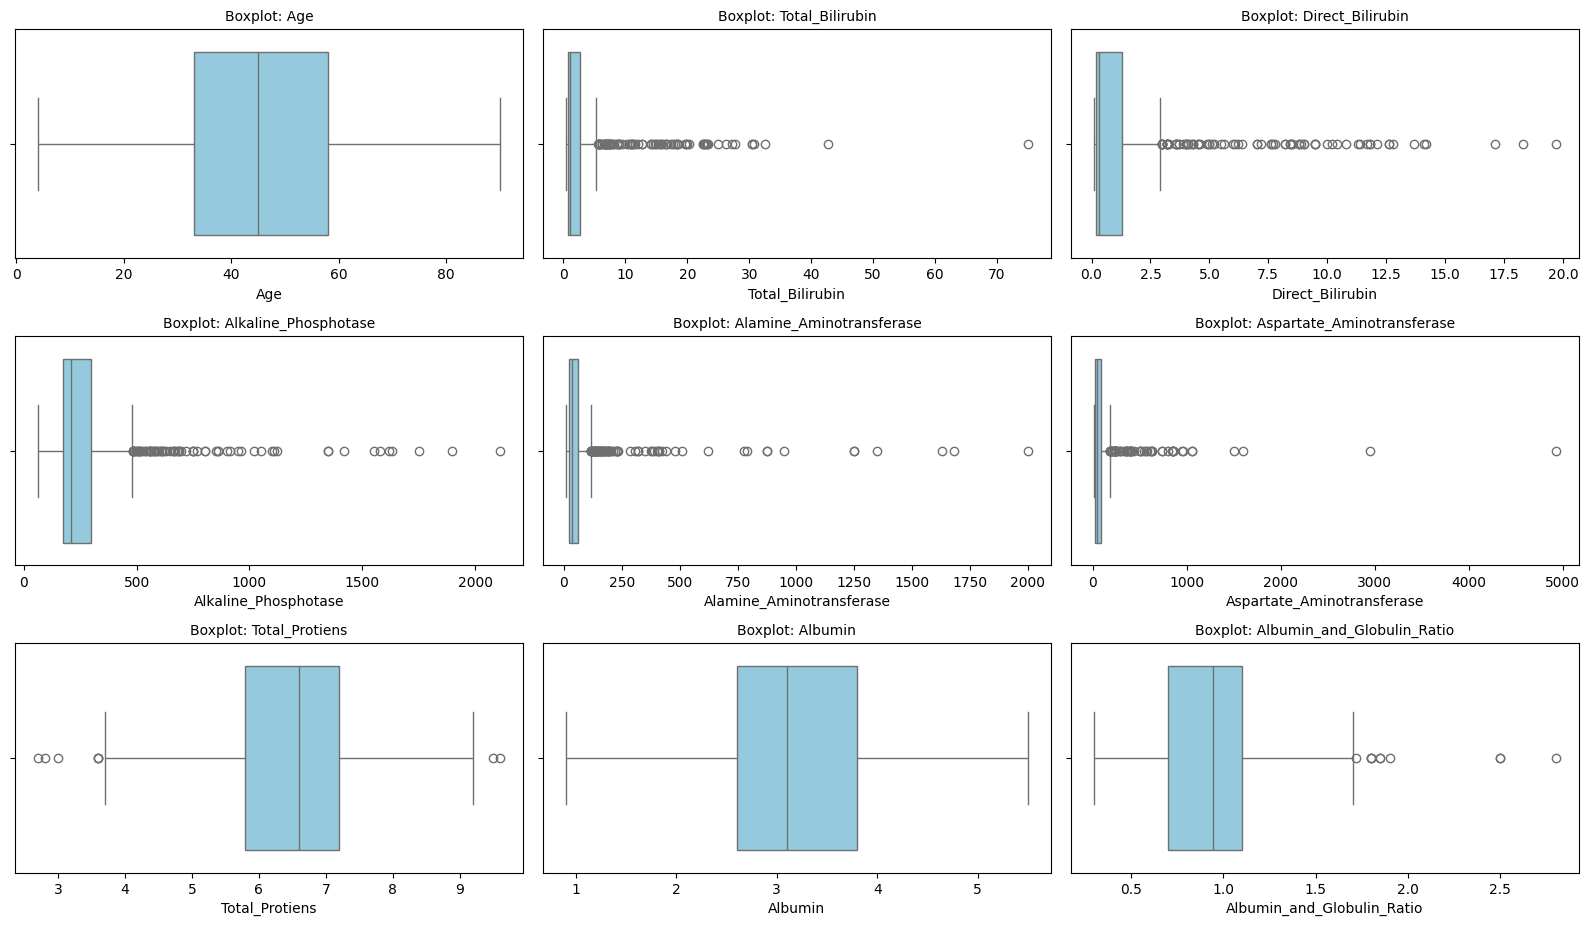

In [22]:
plt.figure(figsize=(16, 12))

# Loop untuk buat subplot boxplot per kolom
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)  # atur dalam grid 4 baris × 3 kolom
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot: {col}', fontsize=10)
    plt.tight_layout()

plt.show()

In [23]:
for col in numerical_cols:
    skew_val = df[col].skew()
    print(f'{col} skewness: {skew_val:.2f}')

Age skewness: -0.03
Total_Bilirubin skewness: 4.91
Direct_Bilirubin skewness: 3.21
Alkaline_Phosphotase skewness: 3.77
Alamine_Aminotransferase skewness: 6.55
Aspartate_Aminotransferase skewness: 10.55
Total_Protiens skewness: -0.29
Albumin skewness: -0.04
Albumin_and_Globulin_Ratio skewness: 1.00


In [24]:
df['Dataset'].value_counts()

,count
Dataset,
1,416
2,167


**Observasi:**
* Data tidak seimbang, mayoritas pasien memiliki penyakit liver. Dapat dilihat pada kolom `Dataset` yang memiliki nilai 1 (liver disease) dan 2 (sehat).
* _Mean ~ 50% (Median)_ di kolom `Age`, `Total_Protiens`, `Albumindan`, dan `Albumin_and_Globulin_Ratio`, menunjukkan distribusi yang mendekati simetris.
* Sedangkan untuk kolom `Total_Bilirubin`, `Direct_Bilirubin`,`Alkaline_Phosphotase`,`Alamine_Aminotransferase`, dan `Aspartate_Aminotransferase` menunjukan distribusi yang righ-skewed


# 4. Mengatasi Duplikat Data

In [25]:
# Mengecek apakah ada duplicate di seluruh kolom
check_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat = {check_duplicate}")

Jumlah data yang duplikat = 13


In [26]:
# Handling duplicate
df = df.drop_duplicates()

In [27]:
# Mengecek duplicate setelah di-handle
handle_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat = {handle_duplicate}")

Jumlah data yang duplikat = 0
